<a href="https://colab.research.google.com/github/awbasit/Prediction-of-Fluoride-Concentration/blob/main/Prediction_of_Fluoride.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("water dataset.csv")
df

,Sample ID,Community,pH,Temp,EC,TDS,Na+,K+,Mg2+,Ca2+,Cl-,SO42-,HCO3-,NO3-,F-
0,61-16-Gu-BH 01,Yishei,9.55,30.00,505.00,258.00,0.20,64.00,39.80,1.20,14.70,1.85,58.40,92.50,19.50
1,62-16-Gu-BH 01,Burkina,8.64,30.00,772.00,394.00,6.90,87.70,53.60,21.20,1.34,2.70,315.20,40.00,12.90
2,63-16-Gu-BH 01,Gungula,8.36,30.00,574.00,293.00,7.60,56.50,46.70,0.00,0.95,2.36,320.30,2.50,6.90
3,64-16-Gu-BH 01,Bilsinga Chidomyili,8.50,29.70,594.00,303.00,0.80,66.80,48.00,1.40,3.65,1.68,172.00,87.50,5.10
4,65-16-Gu-BH 01,Sugu,8.02,29.80,798.00,407.00,0.20,92.20,68.50,24.90,0.40,42.10,363.20,20.00,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,NaN,NaN,9.21,28.23,642.78,308.36,10.32,118.25,40.08,7.29,3.90,10.53,218.96,88.09,4.55
2009,NaN,NaN,8.93,28.43,476.29,342.31,4.27,63.08,53.56,9.91,6.35,23.16,350.69,50.34,18.50
2010,NaN,NaN,8.24,26.49,640.59,237.94,0.83,54.41,45.84,4.56,11.87,14.57,130.54,48.23,15.56
2011,NaN,NaN,8.91,25.96,789.28,209.10,6.19,72.69,14.83,12.82,10.71,27.40,264.63,44.48,16.17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  15 non-null     object 
 1   Community  15 non-null     object 
 2   pH         2013 non-null   float64
 3   Temp       2013 non-null   float64
 4   EC         2013 non-null   float64
 5   TDS        2013 non-null   float64
 6   Na+        2013 non-null   float64
 7   K+         2013 non-null   float64
 8   Mg2+       2013 non-null   float64
 9   Ca2+       2013 non-null   float64
 10  Cl-        2013 non-null   float64
 11  SO42-      2013 non-null   float64
 12  HCO3-      2013 non-null   float64
 13  NO3-       2013 non-null   float64
 14  F-         2013 non-null   float64
dtypes: float64(13), object(2)
memory usage: 236.0+ KB


In [ ]:
df.describe()

,pH,Temp,EC,TDS,Na+,K+,Mg2+,Ca2+,Cl-,SO42-,HCO3-,NO3-,F-
count,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000,2013.000000
mean,7.977561,27.686910,538.268520,295.399265,5.692717,60.715395,33.915067,21.567750,7.425892,21.436816,232.216095,47.635683,9.808018
std,0.912625,1.426201,153.821449,64.620233,3.198589,33.075353,19.820615,12.591483,4.118214,11.863044,99.537530,26.002496,5.701273
min,6.420000,25.200000,264.000000,184.800000,0.100000,2.800000,0.600000,0.000000,0.370000,0.500000,58.400000,2.500000,0.000000
25%,7.190000,26.440000,401.940000,236.450000,2.970000,33.350000,16.330000,10.630000,3.950000,11.340000,145.680000,25.750000,4.830000
50%,7.950000,27.730000,541.120000,297.130000,5.700000,60.120000,34.040000,21.550000,7.360000,21.840000,231.450000,47.430000,9.880000
75%,8.780000,28.950000,669.330000,350.430000,8.390000,88.830000,50.760000,32.590000,10.970000,31.340000,317.900000,69.990000,14.740000
max,9.550000,30.100000,798.000000,408.000000,11.400000,119.000000,68.500000,43.200000,14.700000,42.100000,403.700000,92.500000,19.500000


In [ ]:
# Assuming your dataset is loaded into a DataFrame called df
df = df.drop(['Sample ID', 'Community'], axis=1)

# Display the updated DataFrame
df

,pH,Temp,EC,TDS,Na+,K+,Mg2+,Ca2+,Cl-,SO42-,HCO3-,NO3-,F-
0,9.55,30.00,505.00,258.00,0.20,64.00,39.80,1.20,14.70,1.85,58.40,92.50,19.50
1,8.64,30.00,772.00,394.00,6.90,87.70,53.60,21.20,1.34,2.70,315.20,40.00,12.90
2,8.36,30.00,574.00,293.00,7.60,56.50,46.70,0.00,0.95,2.36,320.30,2.50,6.90
3,8.50,29.70,594.00,303.00,0.80,66.80,48.00,1.40,3.65,1.68,172.00,87.50,5.10
4,8.02,29.80,798.00,407.00,0.20,92.20,68.50,24.90,0.40,42.10,363.20,20.00,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,9.21,28.23,642.78,308.36,10.32,118.25,40.08,7.29,3.90,10.53,218.96,88.09,4.55
2009,8.93,28.43,476.29,342.31,4.27,63.08,53.56,9.91,6.35,23.16,350.69,50.34,18.50
2010,8.24,26.49,640.59,237.94,0.83,54.41,45.84,4.56,11.87,14.57,130.54,48.23,15.56
2011,8.91,25.96,789.28,209.10,6.19,72.69,14.83,12.82,10.71,27.40,264.63,44.48,16.17


In [ ]:
# Check if any missing values exist in the entire dataset
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


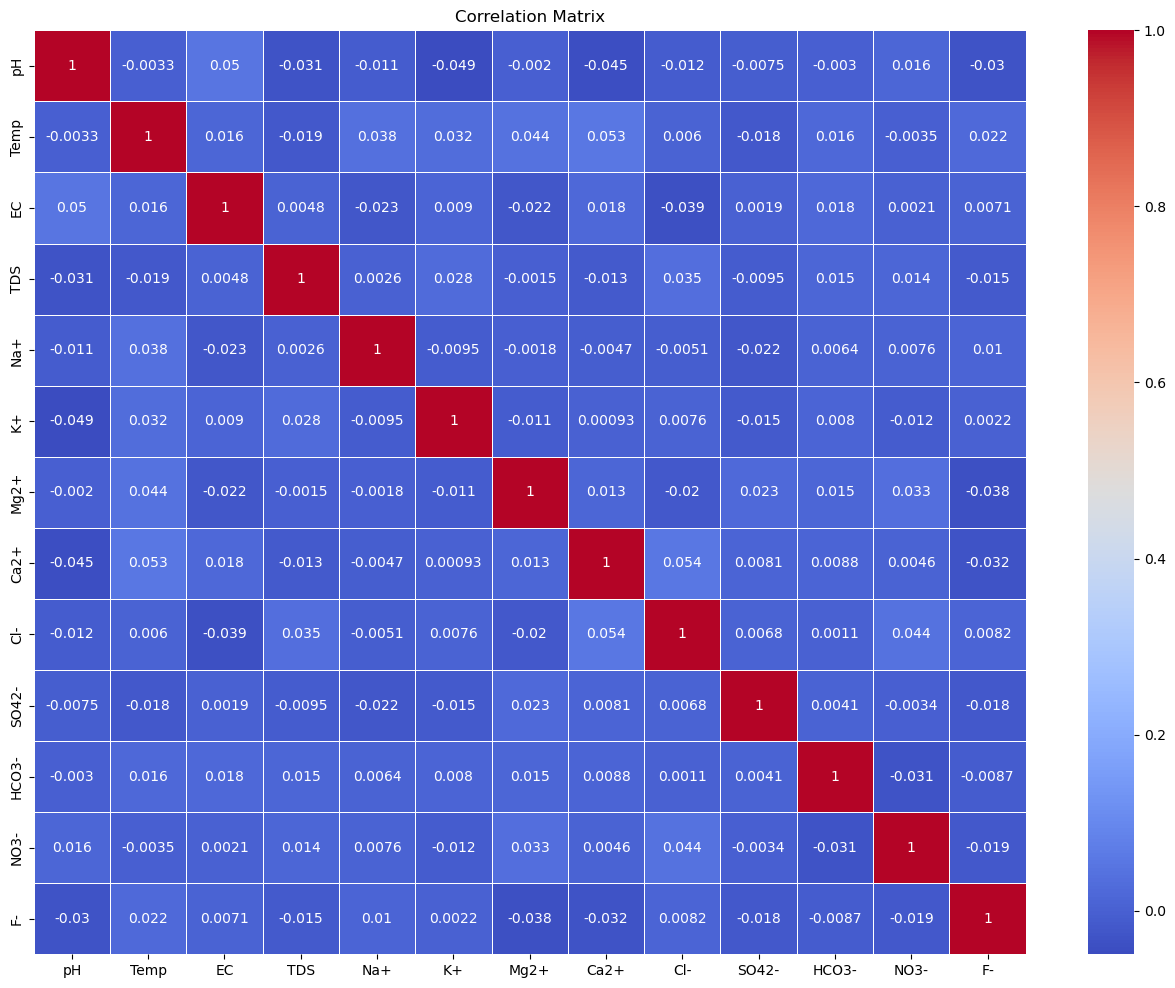

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

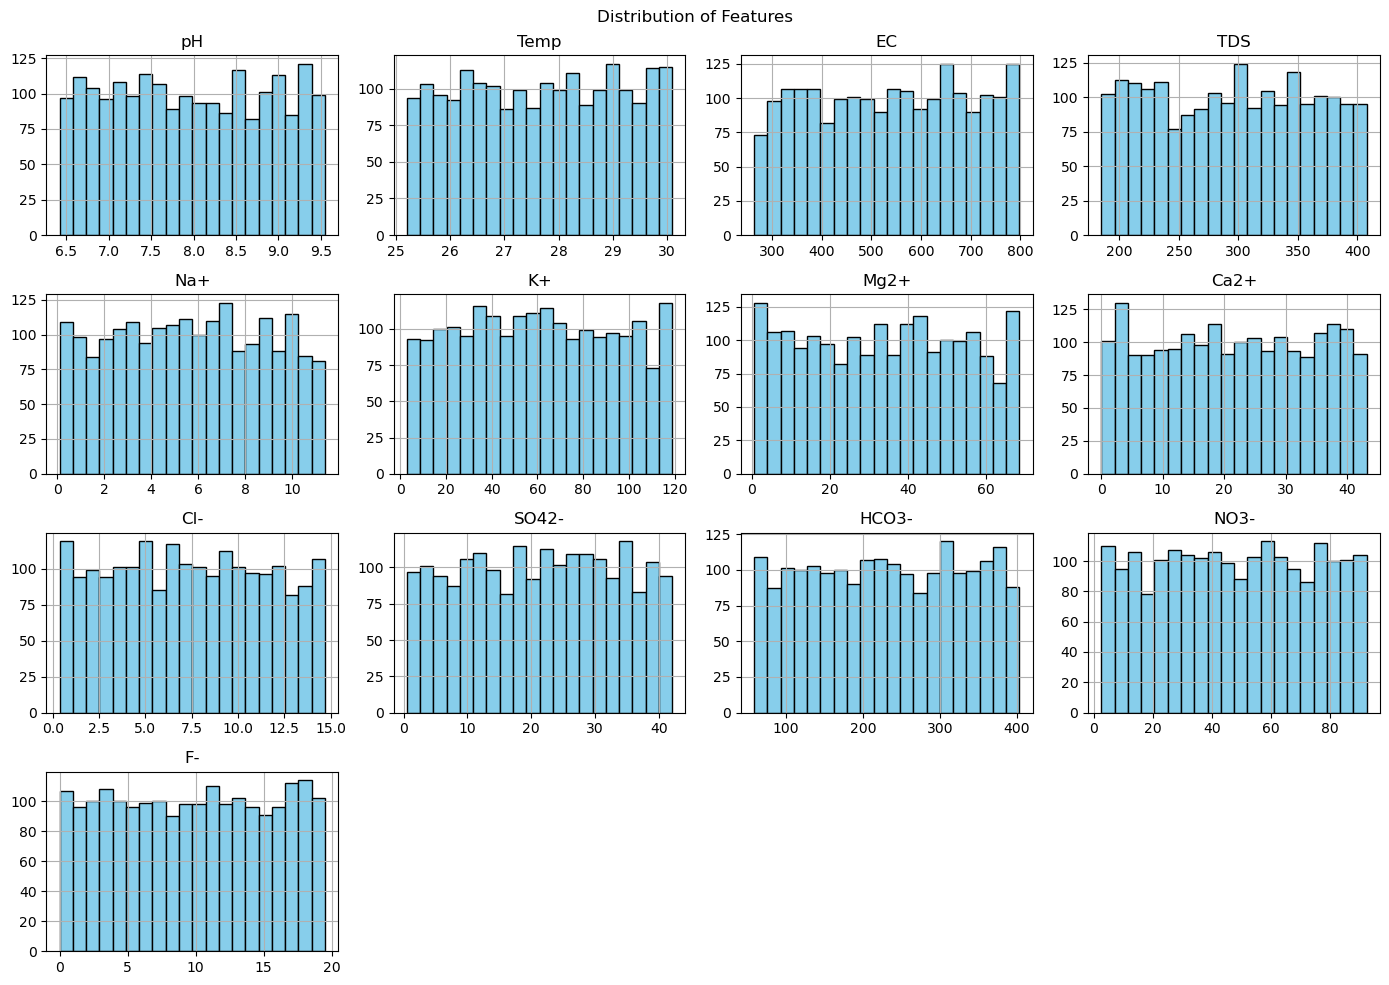

In [ ]:
# Plot histograms for each column
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()


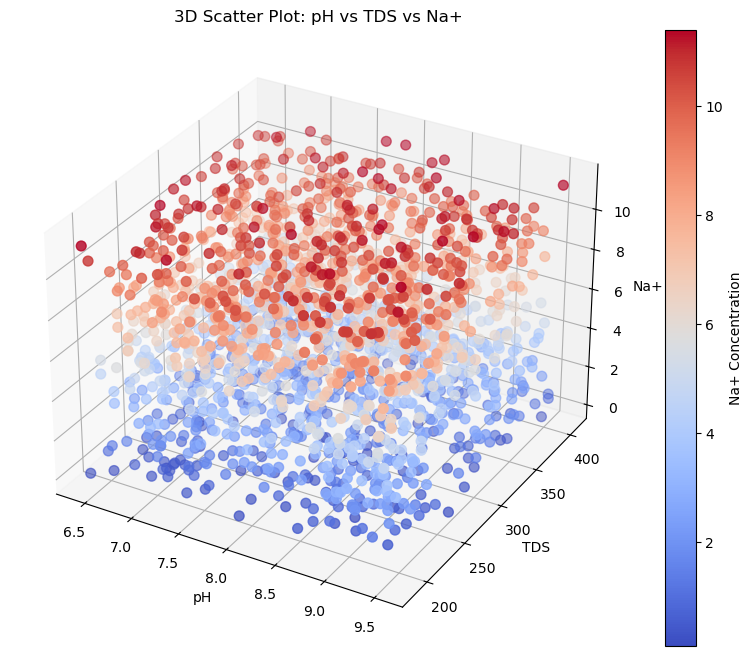

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for pH, TDS, and Na+
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['pH'], df['TDS'], df['Na+'], c=df['Na+'], cmap='coolwarm', s=50)
ax.set_xlabel('pH')
ax.set_ylabel('TDS')
ax.set_zlabel('Na+')
plt.title('3D Scatter Plot: pH vs TDS vs Na+')

plt.colorbar(sc, label='Na+ Concentration')
plt.show()


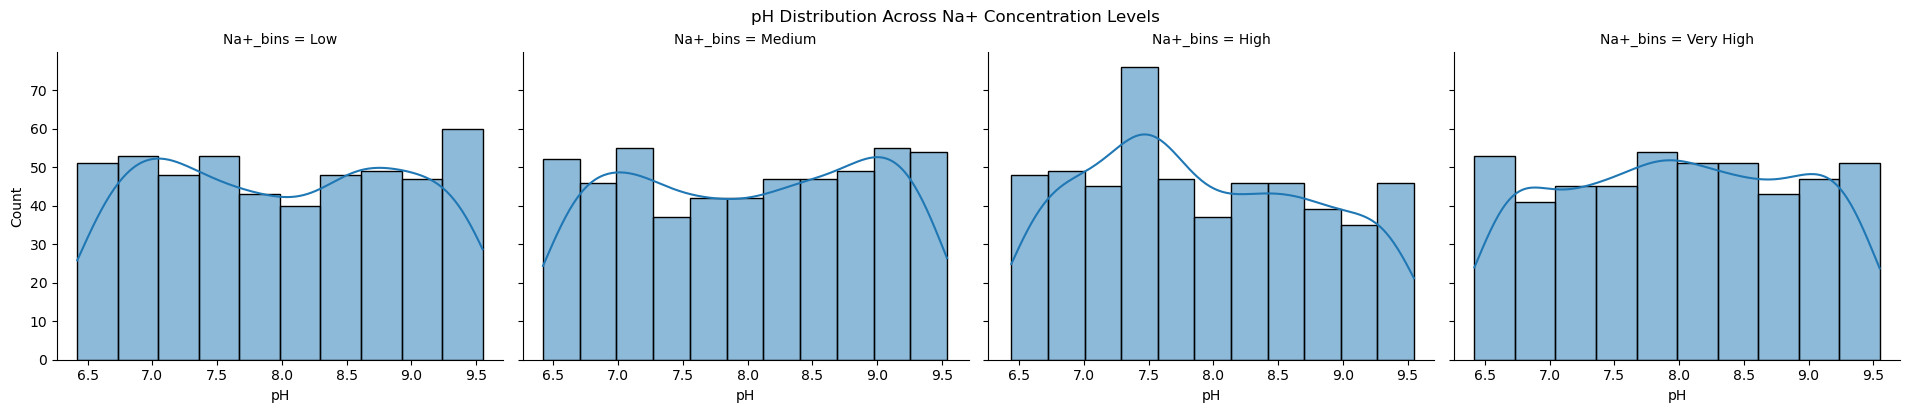

In [ ]:
# Creating bins for Na+ concentrations to facet over
df['Na+_bins'] = pd.cut(df['Na+'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

# FacetGrid to show pH distribution across Na+ concentration bins
g = sns.FacetGrid(df, col='Na+_bins', height=4, aspect=1.2)
g.map(sns.histplot, 'pH', kde=True)
plt.suptitle("pH Distribution Across Na+ Concentration Levels", y=1.02)
plt.show()


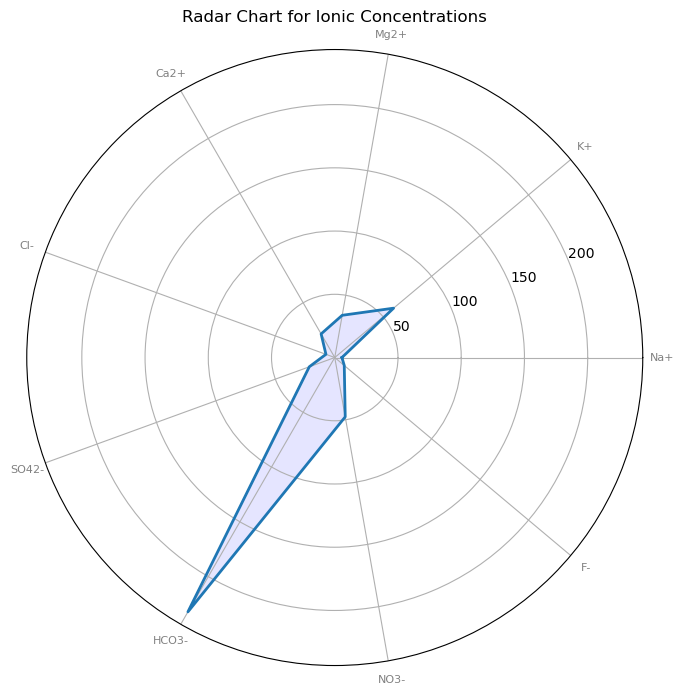

In [ ]:
import numpy as np
from math import pi

# Prepare data for radar chart (average per feature for simplicity)
features = ['Na+', 'K+', 'Mg2+', 'Ca2+', 'Cl-', 'SO42-', 'HCO3-', 'NO3-', 'F-']
values = df[features].mean().values.flatten().tolist()
values += values[:1]  # Ensure it loops back to the first value

# Plot radar chart
N = len(features)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], features, color='grey', size=8)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title("Radar Chart for Ionic Concentrations")
plt.show()


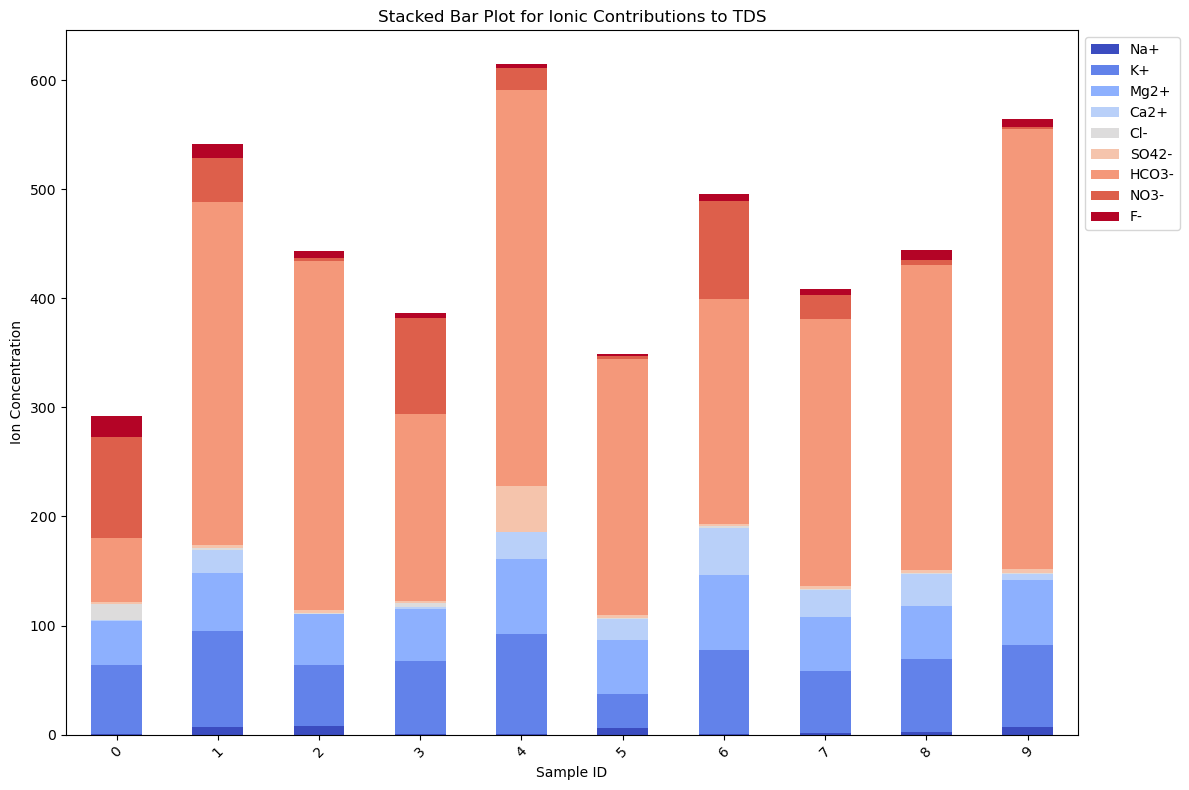

In [ ]:
# Select key ionic columns
ionic_cols = ['Na+', 'K+', 'Mg2+', 'Ca2+', 'Cl-', 'SO42-', 'HCO3-', 'NO3-', 'F-']

# Plot stacked bar chart
df[ionic_cols].head(10).plot(kind='bar', stacked=True, figsize=(12, 8), colormap='coolwarm')
plt.title("Stacked Bar Plot for Ionic Contributions to TDS")
plt.ylabel("Ion Concentration")
plt.xlabel("Sample ID")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


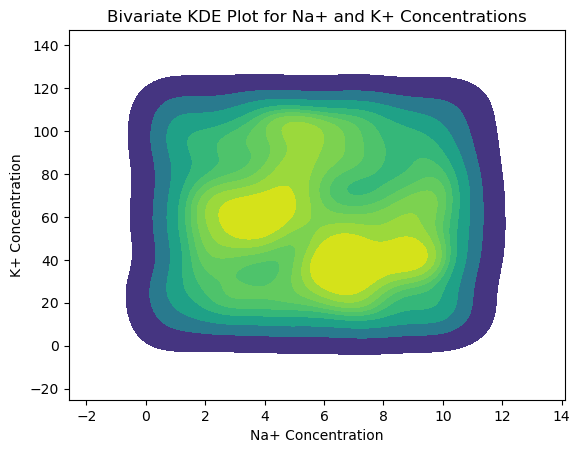

In [ ]:
# Bivariate KDE plot for Na+ and K+
sns.kdeplot(x='Na+', y='K+', data=df, cmap='viridis', fill=True)
plt.title('Bivariate KDE Plot for Na+ and K+ Concentrations')
plt.xlabel('Na+ Concentration')
plt.ylabel('K+ Concentration')
plt.show()


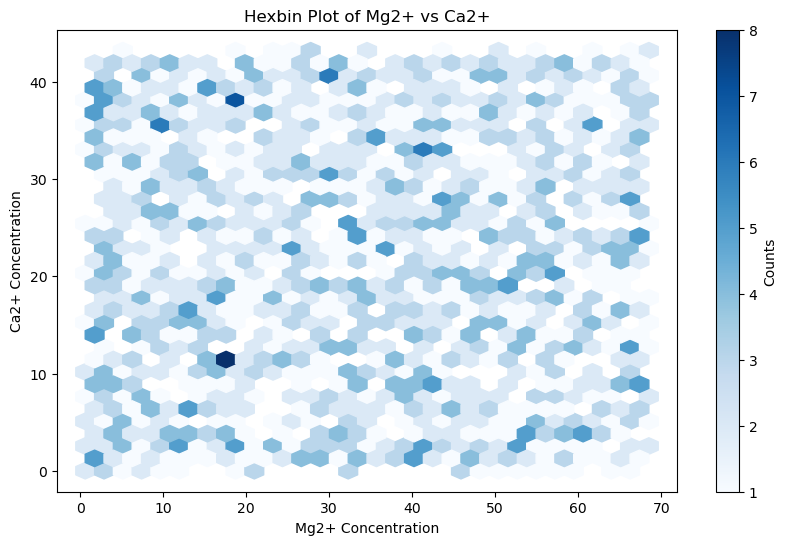

In [ ]:
# Hexbin plot for Mg2+ vs Ca2+
plt.figure(figsize=(10, 6))
plt.hexbin(df['Mg2+'], df['Ca2+'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Mg2+ vs Ca2+')
plt.xlabel('Mg2+ Concentration')
plt.ylabel('Ca2+ Concentration')
plt.show()


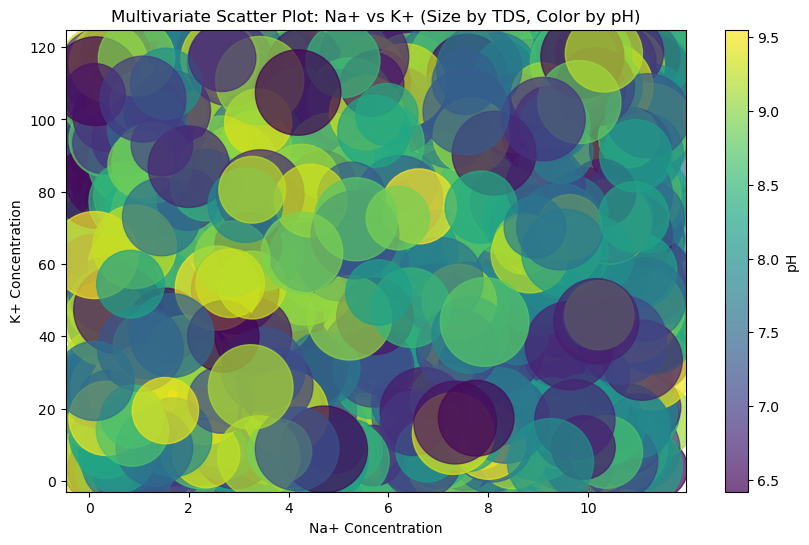

In [ ]:
# Scatter plot with size based on TDS and color based on pH
plt.figure(figsize=(10, 6))
plt.scatter(df['Na+'], df['K+'], s=df['TDS']*10, c=df['pH'], cmap='viridis', alpha=0.7)
plt.colorbar(label='pH')
plt.title('Multivariate Scatter Plot: Na+ vs K+ (Size by TDS, Color by pH)')
plt.xlabel('Na+ Concentration')
plt.ylabel('K+ Concentration')
plt.show()


In [ ]:
import numpy as np
from scipy import stats

# Step 1: Calculate Z-scores for each feature in the dataset
z_scores = np.abs(stats.zscore(df[['pH', 'Temp', 'EC', 'TDS', 'Na+', 'K+', 'Mg2+', 'Ca2+', 'Cl-', 'SO42-', 'HCO3-', 'NO3-']]))

# Step 2: Set a threshold (e.g., Z > 3)
threshold = 3
outliers_zscore = np.where(z_scores > threshold)

# Step 3: Display the indices of the outliers
print("Indices of outliers based on Z-score method:", outliers_zscore)

# If you want to remove the outliers, you can filter them out
df_clean_zscore = df[(z_scores < threshold).all(axis=1)]
print(f"Data shape after removing outliers using Z-score: {df_clean_zscore.shape}")


Indices of outliers based on Z-score method: (array([], dtype=int64), array([], dtype=int64))
Data shape after removing outliers using Z-score: (2013, 14)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is the dataframe with your data
# Step 1: Check for missing values (if not done already)
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Step 2: Extract features (X) and target (y)
X = df[['pH', 'Temp', 'EC', 'TDS', 'Na+', 'K+', 'Mg2+', 'Ca2+', 'Cl-', 'SO42-', 'HCO3-', 'NO3-']]
y = df['F-']

# Step 3: Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Feature scaling (regularization) using StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# The dataset is now preprocessed and ready for modeling
print("Data preprocessing complete. Ready for modeling.")


Missing values per column:
 pH          0
Temp        0
EC          0
TDS         0
Na+         0
K+          0
Mg2+        0
Ca2+        0
Cl-         0
SO42-       0
HCO3-       0
NO3-        0
F-          0
Na+_bins    0
dtype: int64
Data preprocessing complete. Ready for modeling.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
from sklearn.linear_model import SGDRegressor


In [ ]:
# Split the data (features and target)
X = df[['pH', 'Temp', 'EC', 'TDS', 'Na+', 'K+', 'Mg2+', 'Ca2+', 'Cl-', 'SO42-', 'HCO3-', 'NO3-']]
y = df['F-']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA (e.g., keeping 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")


Original number of features: 12
Reduced number of features after PCA: 12


In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_pca)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_accuracy = accuracy_score(np.round(y_test), np.round(y_pred_xgb))

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost Accuracy: {xgb_accuracy}")


XGBoost RMSE: 6.556056387733609
XGBoost Accuracy: 0.07692307692307693


In [ ]:
# Initialize and train the SVM model (using Support Vector Regressor here)
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_pca)
svm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_svm))
svm_accuracy = accuracy_score(np.round(y_test), np.round(y_pred_svm))

print(f"SVM RMSE: {svm_rmse}")
print(f"SVM Accuracy: {svm_accuracy}")


SVM RMSE: 5.768216619441227
SVM Accuracy: 0.05459057071960298


In [ ]:
# Initialize and train the Gradient Descent Regressor
gd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
gd_model.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_gd = gd_model.predict(X_test_pca)
gd_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gd))
gd_accuracy = accuracy_score(np.round(y_test), np.round(y_pred_gd))

print(f"Gradient Descent RMSE: {gd_rmse}")
print(f"Gradient Descent Accuracy: {gd_accuracy}")


Gradient Descent RMSE: 5.737207477073625
Gradient Descent Accuracy: 0.04714640198511166


Model Performance Comparison:
              Model      RMSE  Accuracy
0           XGBoost  6.556056  0.076923
1               SVM  5.768217  0.054591
2  Gradient Descent  5.737207  0.047146

Best Model based on RMSE: Gradient Descent with RMSE: 5.7372
Best Model based on Accuracy: XGBoost with Accuracy: 0.0769


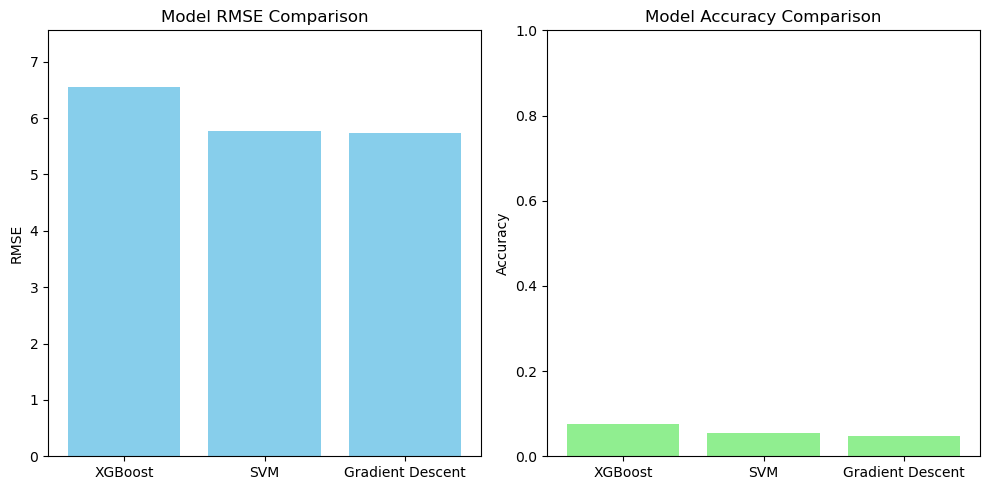

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Collect the results in a DataFrame
results = {
    'Model': ['XGBoost', 'SVM', 'Gradient Descent'],
    'RMSE': [xgb_rmse, svm_rmse, gd_rmse],
    'Accuracy': [xgb_accuracy, svm_accuracy, gd_accuracy]
}

results_df = pd.DataFrame(results)

# Print the results
print("Model Performance Comparison:")
print(results_df)

# Find the best model based on RMSE
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]
best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]

print(f"\nBest Model based on RMSE: {best_rmse_model['Model']} with RMSE: {best_rmse_model['RMSE']:.4f}")
print(f"Best Model based on Accuracy: {best_accuracy_model['Model']} with Accuracy: {best_accuracy_model['Accuracy']:.4f}")

# Visualization of the results
plt.figure(figsize=(10, 5))

# Plot RMSE
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.ylim(0, results_df['RMSE'].max() + 1)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['Accuracy'], color='lightgreen')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
